In [1]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
columns = ['Number','Name','Type1','Type2','Pokedex']
df = pd.DataFrame(columns = columns)

In [ ]:
import requests
from bs4 import BeautifulSoup

URL = 'https://pokemondb.net/pokedex/250'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')
#soup #checks to see if we get the HTML for Pokemon 251 Ho-Oh

In [ ]:
pokedex_html = soup.find_all("td",{"class": "cell-med-text"})
pokedex = "\n".join([i.text for i in pokedex_html])
print(pokedex)

Legends claim this POKéMON flies the world’s skies continuously on its magnificent seven-colored wings.
A legend says that its body glows in seven colors. A rainbow is said to form behind it when it flies.
It will reveal itself before a pure-hearted trainer by shining its bright rainbow-colored wings.
HO-OH’s feathers glow in seven colors depending on the angle at which they are struck by light. These feathers are said to bring happiness to the bearers. This POKéMON is said to live at the foot of a rainbow.
A legend says that its body glows in seven colors. A rainbow is said to form behind it when it flies.
Legends claim this POKéMON flies the world’s skies continuously on its magnificent seven-colored wings.
Its feathers--which glow in seven colors depending on the angle at which they are struck by light--are thought to bring joy. It is said to live at the foot of a rainbow.
Its feathers are in seven colors. It is said that anyone seeing it is promised eternal happiness.
Legends claim

In [ ]:
type_html = soup.find_all("a", {"class": re.compile('.*itype.*')})[0].text
type_html = soup.find_all("a", {"class": re.compile('.*itype.*')})[1].text
print(type_html)

Flying


In [ ]:
df = pd.DataFrame(columns = columns)
#898 pokemon total
for number in range(1,899):


    URL = 'https://pokemondb.net/pokedex/' + str(number)
    page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    
    name_html = str(soup.find("title"))
    end = str(name_html).find(" Pokédex")
    name = name_html[7:end]
    
    pokedex_html = soup.find_all("td",{"class": "cell-med-text"})
    pokedex = "\n".join([i.text for i in pokedex_html])
    
    type_1 = soup.find_all("a", {"class": re.compile('.*itype.*')})[0].text
    type_2 = None
    try:
        type_2 = soup.find_all("a", {"class": re.compile('.*itype.*')})[1].text
        if type_1 == type_2:
            type_2 = None
    except: pass
    
    poke = pd.DataFrame(data={columns[0]:[number], columns[1]:[name], columns[2]:[type_1], columns[3]:[type_2], columns[4]: [pokedex]})
    df = df.append(poke, ignore_index=True)
    if number % 50 == 0:
        print("Added " + str(number) + "!")

df.head()

Added 50!
Added 100!
Added 150!
Added 200!
Added 250!
Added 300!
Added 350!
Added 400!
Added 450!
Added 500!
Added 550!
Added 600!
Added 650!
Added 700!
Added 750!
Added 800!
Added 850!


,Number,Name,Type1,Type2,Pokedex
0,1,Bulbasaur,Grass,Poison,A strange seed was planted on its back at birt...
1,2,Ivysaur,Grass,Poison,"When the bulb on its back grows large, it appe..."
2,3,Venusaur,Grass,Poison,The plant blooms when it is absorbing solar en...
3,4,Charmander,Fire,None,"Obviously prefers hot places. When it rains, s..."
4,5,Charmeleon,Fire,None,"When it swings its burning tail, it elevates t..."


In [ ]:
df.groupby("Type1").count()[["Name", "Type2"]].sort_values("Name")

,Name,Type2
Type1,,
Flying,7,4
Fairy,21,4
Ice,28,15
Steel,30,22
Ghost,31,18
Dragon,31,18
Ground,35,18
Poison,35,19
Dark,36,26


In [ ]:
df.to_csv('pokedex_db.csv', index=False)

In [25]:
pokemon = pd.read_csv('pokedex_db.csv')
pokemon[pokemon["Name"] == "Oddish"]["Pokedex"].values

array(['During the day, it keeps its face buried in the ground. At night, it wanders around sowing its seeds.\nIt may be mistaken for a clump of weeds. If you try to yank it out of the ground, it shrieks horribly.\nAwakened by moonlight, it roams actively at night. In the day, it stays quietly underground.\nIf exposed to moonlight, it starts to move. It roams far and wide at night to scatter its seeds.\nDuring the day, it stays in the cold underground to avoid the sun. It grows by bathing in moonlight.\nDuring the daytime, ODDISH buries itself in soil to absorb nutrients from the ground using its entire body. The more fertile the soil, the glossier its leaves become.\nODDISH searches for fertile, nutrient-rich soil, then plants itself. During the daytime, while it is planted, this POKéMON’s feet are thought to change shape and become similar to the roots of trees.\nIts scientific name is “Oddium Wanderus.” At night, it is said to walk nearly 1,000 feet on its two roots.\nDuring the day

## Performing One Hot Encoding of Data / Simplest Model

In [32]:
#Encode the primary Type as a label
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
pokemon["label"] = label_enc.fit_transform(pokemon[["Type1"]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
print(pokemon[pokemon["Type1"] == "Normal"].count()[0])
print(pokemon[(pokemon["Type1"] == "Normal") & (pokemon["Type2"] == "Flying")].count()[0])

pokemon["label_adjust"] = [7 if pokemon["Type1"].loc[x] == "Normal" and pokemon["Type2"].loc[x] == "Flying" else pokemon["label"].loc[x] for x in range(0, len(pokemon))]

109
26


In [35]:
import re
pokemon["Pokedex"] = pokemon["Pokedex"].str.lower() #make everything lower-case
pokemon["Pokedex"] = pokemon["Pokedex"].replace(to_replace= '\n', value=' ', regex=True) #remove "Pokemon"
pokemon["Pokedex"] = pokemon["Pokedex"].replace(to_replace= 'é', value='e', regex=True) #remove "Pokemon"
pokemon["Pokedex"] = pokemon["Pokedex"].replace(to_replace= "['’-]", value=' ', regex=True) #separate out possessives
pokemon["Pokedex"] = pokemon["Pokedex"].replace(to_replace= r'[^a-zA-Z0-9 ]', value='', regex=True) #remove punctuation
pokemon["Pokedex"] = pokemon["Pokedex"].replace(to_replace=[i.lower() for i in pokemon.Name.values], value='', regex=True) #remove names
pokemon["Pokedex"] = pokemon["Pokedex"].replace(to_replace= 'pokemon', value='', regex=True) #remove "Pokemon"
pokemon["Pokedex"] = pokemon["Pokedex"].replace(to_replace= '[0-9]+', value='#', regex=True) #replace numbers
pokemon["Pokedex"] = pokemon["Pokedex"].replace(to_replace= r"\s+", value=' ', regex=True) #get rid of extra spaces
pokemon.Pokedex.values[0:2]

array(['a strange seed was planted on its back at birth the plant sprouts and grows with this it can go for days without eating a single morsel in the bulb on its back it stores energy the seed on its back is filled with nutrients the seed grows steadily larger as its body grows it carries a seed on its back right from birth as it grows older the seed also grows larger while it is young it uses the nutrients that are stored in the seeds on its back in order to grow can be seen napping in bright sunlight there is a seed on its back by soaking up the sun s rays the seed grows progressively larger there is a plant seed on its back right from the day this is born the seed slowly grows larger a strange seed was planted on its back at birth the plant sprouts and grows with this for some time after its birth it grows by gaining nourishment from the seed on its back the seed on its back is filled with nutrients the seed grows steadily larger as its body grows it carries a seed on its back righ

In [37]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

tokens = []
for i in range(0, len(pokemon.Pokedex.values)):
    #tokens.append(nltk.word_tokenize(pokemon.Pokedex.values[i]))
    tokens.append(pokemon.Pokedex.values[i].split(' '))
print("Created tokens.")

text = []
for i in range(0,len(tokens)):
    text = text + tokens[i]
text = sorted(list(set(text)))
print("Done list of text.")
    
poke_tokens = np.setdiff1d(text,stopwords.words("english"))
print("Removed stop-words and flattened.")
    
del tokens
del text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Created tokens.
Done list of text.
Removed stop-words and flattened.


In [38]:
from nltk.stem import SnowballStemmer 
stemmer = SnowballStemmer("english")
stemmed = []
for word in poke_tokens:
    stemmed.append(stemmer.stem(word))

In [39]:
poke_array = []
tmp_array = []
for i in range(0,898):
    tmp_array.append(np.setdiff1d(pokemon.Pokedex.values[i].split(' '),stopwords.words("english")))
    if i % 89 == 0 and i > 0: print('Another 10 percent finished.')
    res = [list(poke_tokens).index(x) for x in tmp_array[0]]
    poke_array.append([stemmed[x] for x in res])
    poke_array[i] = list(set(x for x in poke_array[i]))
    tmp_array = []
del res
del tmp_array

Another 10 percent finished.
Another 10 percent finished.
Another 10 percent finished.
Another 10 percent finished.
Another 10 percent finished.
Another 10 percent finished.
Another 10 percent finished.
Another 10 percent finished.
Another 10 percent finished.
Another 10 percent finished.


In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=len(list(set(stemmed))))
tokenizer.fit_on_texts(list(set(stemmed)))
word_index = tokenizer.word_index

In [41]:
#mlb.fit([list(set(stemmed))]).transform([np.setdiff1d(pokemon.Pokedex.values[0].split(' '),stopwords.words("english"))])
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb = mlb.fit([list(set(stemmed))])
df_ohe = mlb.transform(poke_array)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mlb.transform(poke_array), pokemon.label_adjust.values, test_size=0.2, random_state=42, stratify = pokemon.label_adjust.values)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_train, y_train = ros.fit_sample(X_train, y_train)

In [77]:
from sklearn.naive_bayes import BernoulliNB
#from sklearn.naive_bayes import GaussianNB
mod_NB = BernoulliNB()
mod_NB.fit(X_train, y_train)
print("BernoulliNB: Training score:", mod_NB.score(X_train, y_train), ", Test score:", mod_NB.score(X_test, y_test))

Training score: 0.963718820861678 , Test score: 0.4888888888888889


In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

model = Sequential()
model.add(Dense(12, input_dim=len(list(set(stemmed))), activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(12, activation='relu'))
model.add(Dense(18, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, to_categorical(y_train), epochs=500, verbose = 0)
_, accuracy = model.evaluate(X_test, to_categorical(y_test), verbose = 0)
print('NN Test score: %.2f' % (accuracy*100))

Accuracy: 38.89


## Using GLoVe Embeddings

It is also possible to split each Pokemon into their individual dex entries. We will have many more rows of data, but the length of each should be more manageable. Also, with GLoVe that we can predict on words that aren't seen in the training data since we can use similarity.

We will use glove-6b-200d for this. We could get higher scores by using more dimensions or the 42B data (1.9M vs 400k words) but this is more POC.

In [84]:
from sklearn.preprocessing import LabelEncoder
columns = ['Number','Name','Type1','Type2','Pokedex','label']
pokemon_2 = pd.DataFrame()

pokemon = pd.read_csv('pokedex_db.csv')
pokemon["label"] = LabelEncoder().fit_transform(pokemon.Type1.values)

for i in range(0,len(pokemon)):
    for entry in pokemon.iloc[i]["Pokedex"].split('\n'):
        pokemon_2 = pd.concat([pokemon_2,pd.DataFrame([[pokemon.iloc[i]["Number"], pokemon.iloc[i]["Name"], pokemon.iloc[i]["Type1"], pokemon.iloc[i]["Type2"], entry, pokemon.iloc[i]["label"]]])])

pokemon_2.columns = columns
pokemon_2 = pokemon_2.reset_index(drop=True)

pokemon_2["label"] = [7 if pokemon_2["Type1"].loc[x] == "Normal" and pokemon_2["Type2"].loc[x] == "Flying" else pokemon_2["label"].loc[x] for x in range(0, len(pokemon_2))]

In [85]:
pokemon_2

,Number,Name,Type1,Type2,Pokedex,label
0,1,Bulbasaur,Grass,Poison,A strange seed was planted on its back at birt...,9
1,1,Bulbasaur,Grass,Poison,It can go for days without eating a single mor...,9
2,1,Bulbasaur,Grass,Poison,The seed on its back is filled with nutrients....,9
3,1,Bulbasaur,Grass,Poison,It carries a seed on its back right from birth...,9
4,1,Bulbasaur,Grass,Poison,"While it is young, it uses the nutrients that ...",9
...,...,...,...,...,...,...
10723,898,Calyrex,Psychic,Grass,Calyrex is known in legend as a king that rule...,14
10724,898,Calyrex,Psychic,Grass,"According to lore, this Pokémon showed no merc...",14
10725,898,Calyrex,Psychic,Grass,It’s said that this Pokémon once moved a large...,14
10726,898,Calyrex,Psychic,Grass,It’s said that Calyrex and a Pokémon that had ...,14


In [86]:
pokemon_2["Pokedex_glove"] = pokemon_2["Pokedex"].str.lower() #make everything lower-case
pokemon_2["Pokedex_glove"] = pokemon_2["Pokedex_glove"].replace(to_replace= 'é', value='e', regex=True) #correct "Pokemon"
pokemon_2["Pokedex_glove"] = pokemon_2["Pokedex_glove"].replace(to_replace= "['’-]", value=' ', regex=True) #separate out possessives and dash
pokemon_2["Pokedex_glove"] = pokemon_2["Pokedex_glove"].replace(to_replace= r'[^a-zA-Z ]', value='', regex=True) #remove punctuation and numbers
pokemon_2["Pokedex_glove"] = pokemon_2["Pokedex_glove"].replace(to_replace= r"\s+", value=' ', regex=True) #get rid of extra spaces

In [87]:
pokemon_2.Pokedex_glove.values

array(['a strange seed was planted on its back at birth the plant sprouts and grows with this pokemon',
       'it can go for days without eating a single morsel in the bulb on its back it stores energy',
       'the seed on its back is filled with nutrients the seed grows steadily larger as its body grows',
       ...,
       'it s said that this pokemon once moved a large forestand all the pokemon living thereto a new location overnight',
       'it s said that calyrex and a pokemon that had bonded with it ran all across the galar region to bring green to the wastelands',
       'legend says that by using its power to see all events from past to future this pokemon saved the creatures of a forest from a meteorite strike'],
      dtype=object)

In [ ]:
pokemon_2.groupby("Type1").count()[["Name", "Type2"]].sort_values("Name")

,Name,Type2
Type1,,
Flying,31,22
Fairy,225,37
Steel,294,246
Ice,321,200
Dragon,334,192
Ghost,337,212
Dark,347,259
Fighting,401,80
Poison,498,220


In [89]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

tokens = []
for i in range(0, len(pokemon_2.Pokedex_glove.values)):
    tokens.append(nltk.word_tokenize(pokemon_2.Pokedex_glove.values[i]))
    tokens[i] = list(np.setdiff1d(tokens[i],stopwords.words("english")))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [90]:
poke_replace = [i.lower() for i in pokemon.Name.values]
[poke_replace.append(i.lower() + "s") for i in pokemon.Name.values]

for i in range(0,len(tokens)):
    for j in range(0,len(tokens[i])):
        if tokens[i][j] in poke_replace:
            tokens[i][j] = "pokemon"

Text(0.5, 1.0, 'Distribution of tokens per Pokedex Entry')

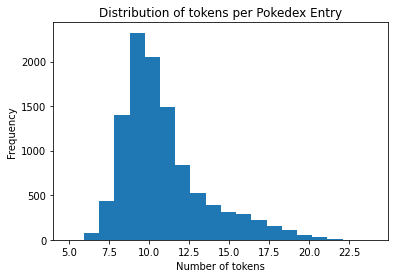

In [98]:
#%matplotlib inline 
#notebook magic to display plots correctly
import matplotlib.pyplot as plt
plt.hist([len(token) for token in tokens], bins = 20)
plt.xlabel("Number of tokens"); plt.ylabel("Frequency")
plt.title("Distribution of tokens per Pokedex Entry")
#print(max([len(token) for token in tokens]))

In [100]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.200d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [102]:
pokemon_glove = []
glove_sublist = []
for token in tokens:
    for word in token:
        try:
            glove_sublist.append(embeddings_dictionary[word])
        except:
            glove_sublist.append(np.zeros(200))
    pokemon_glove.append(glove_sublist)
    glove_sublist = []
del glove_sublist

In [103]:
#using pad_sequences will not work because it pads at the lowest level, so it just completely overwrites with zeros.
for i in range(0, len(pokemon_glove)):
    while len(pokemon_glove[i]) < 20:
        pokemon_glove[i].append(np.zeros(200))
    if len(pokemon_glove[i]) > 20:
        pokemon_glove[i] = pokemon_glove[i][0:20]

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pokemon_glove, pokemon_2.label.values, test_size=0.2, random_state=42, stratify = pokemon_2.label.values)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)

#The RandomOverSampler expects arrays of dimension 2 or less, so it will error unless we reshape, do the sampling, and reshape back to 3 dimensions
mon, vecs, dims = np.array(X_train).shape
X_train = np.array(X_train).reshape((mon,vecs*dims))
X_train, y_train = ros.fit_sample(X_train, y_train)
X_train = X_train.reshape((X_train.shape[0],vecs,dims))

y_train = y_train.astype('float32').reshape((-1,1))
y_test = y_test.astype('float32').reshape((-1,1))

In [109]:
mon, vecs, dims = np.array(X_train).shape
X_train = np.array(X_train).reshape((mons,vecs*dims))

(8582, 20, 200)

In [170]:
weights = np.array(max(pokemon_2.groupby('label').count().Type1)/int(sum(pokemon_2.groupby('label').count().Type1)))/(pokemon_2.groupby('label').count().Type1/sum(pokemon_2.groupby('label').count().Type1))

In [180]:
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

model = Sequential()
model.add(Dense(12, input_shape=(20,200), activation='relu'))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(18, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, to_categorical(y_train), epochs=500, validation_split = 0.1, verbose = 0)
_, accuracy = model.evaluate(np.array(X_test), to_categorical(y_test), verbose = 0)
print('Test accuracy: %.2f' % (accuracy*100))

Accuracy: 40.77


In [182]:
#Get the real accuracy... I checked Method 1 and the NN output for that one is correct, just not for this method
np.mean(model.predict(np.array(X_test)).argmax(axis=-1) == y_test)

0.06507935611801666

## Using BERT Transformer

In [2]:
!pip install transformers

     |████████████████████████████████| 2.1MB 10.6MB/s 
     |████████████████████████████████| 901kB 44.4MB/s 
     |████████████████████████████████| 3.3MB 47.9MB/s 


In [4]:
from sklearn.preprocessing import LabelEncoder
columns = ['Number','Name','Type1','Type2','Pokedex','label']
pokemon_3 = pd.DataFrame()

pokemon = pd.read_csv('pokedex_db.csv')
pokemon["label"] = LabelEncoder().fit_transform(pokemon.Type1.values)

for i in range(0,898):
    for entry in pokemon.iloc[i]["Pokedex"].split('\n'):
        pokemon_3 = pd.concat([pokemon_3,pd.DataFrame([[pokemon.iloc[i]["Number"], pokemon.iloc[i]["Name"], pokemon.iloc[i]["Type1"], pokemon.iloc[i]["Type2"], entry, pokemon.iloc[i]["label"]]])])
        
pokemon_3.columns = columns
pokemon_3 = pokemon_3.reset_index(drop=True)

pokemon_3["label_adjust"] = [7 if pokemon_3["Type1"].loc[x] == "Normal" and pokemon_3["Type2"].loc[x] == "Flying" else pokemon_3["label"].loc[x] for x in range(0, len(pokemon_3))]

In [5]:
pokemon_3["Pokedex_bert"] = pokemon_3["Pokedex"].str.lower() #make everything lower-case
pokemon_3["Pokedex_bert"] = pokemon_3["Pokedex_bert"].replace(to_replace= 'é', value='e', regex=True) #remove "Pokemon"
pokemon_3["Pokedex_bert"] = pokemon_3["Pokedex_bert"].replace(to_replace= "’", value=' ', regex=True) #separate out possessives
pokemon_3["Pokedex_bert"] = pokemon_3["Pokedex_bert"].replace(to_replace= "-", value=' ', regex=True) #separate out possessives
pokemon_3["Pokedex_bert"] = pokemon_3["Pokedex_bert"].replace(to_replace= r'[^a-zA-Z ]', value='', regex=True) #remove punctuation
pokemon_3["Pokedex_bert"] = pokemon_3["Pokedex_bert"].replace(to_replace= r"\s+", value=' ', regex=True) #get rid of extra spaces

In [7]:
!pip install transformers
!pip install gputil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=cae0ec48022d75bf46c732d10eff87e099b9b8cecf1c6d2b0131e6690d518d1e
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 26.3 GB  |     Proc size: 177.1 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total     16280MB
There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [9]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
#model = BertModel.from_pretrained("bert-base-uncased")

In [10]:
pokebert_tokens = []
for i in range(0,len(pokemon_3["Pokedex_bert"])):
    pokebert_tokens.append(tokenizer.encode(pokemon_3["Pokedex_bert"][i], add_special_tokens = True))

In [11]:
print('Max tokenized note length: ', max([len(note) for note in pokebert_tokens]))
print('Average tokenized note length: ', sum([len(note) for note in pokebert_tokens])/ len([len(note) for note in pokebert_tokens]))

Max tokenized note length:  57
Average tokenized note length:  24.790548098434005


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pokebert_tokens, pokemon_3.label_adjust.values, test_size=0.2, random_state=42, stratify = pokemon_3.label_adjust.values)

In [13]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
train_input_ids = pad_sequences(X_train, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
test_input_ids = pad_sequences(X_test, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


In [25]:
def create_attn_mask(token_list):
  # Create attention masks
  attention_masks = []

  # For each note...
  for note in token_list:
      
      # Create the attention mask.
      #   - If a token ID is 0, then it's padding, set the mask to 0.
      #   - If a token ID is > 0, then it's a real token, set the mask to 1.
      att_mask = [int(token_id > 0) for token_id in note]
      
      # Store the attention mask for this sentence.
      attention_masks.append(att_mask)
  return attention_masks

train_masks = create_attn_mask(train_input_ids)
test_masks = create_attn_mask(test_input_ids)

In [14]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_input_ids)
test_inputs = torch.tensor(test_input_ids)

train_labels = torch.tensor(y_train, dtype=torch.long)
test_labels = torch.tensor(y_test, dtype=torch.long)

train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)

In [15]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [16]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 18)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [17]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [209]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 5

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [38]:
import numpy as np

# Helper function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

#Helper function for formatting elapsed times.
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [34]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))


======== Epoch 1 / 3 ========
Training...


ValueError: ignored

In [21]:
# Prediction on test set
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
print('Predicting labels for {:,} test sentences...'.format(len(test_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

  tmp_eval_accuracy = flat_accuracy(logits, label_ids)
  
  # Accumulate the total accuracy.
  eval_accuracy += tmp_eval_accuracy

  # Track the number of batches
  nb_eval_steps += 1

    # Report the final accuracy for this validation run.
print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("  Testing took: {:}".format(format_time(time.time() - t0)))

print('    DONE.')

Predicting labels for 2,146 test sentences...
  Accuracy: 0.73
  Testing took: 0:01:12
    DONE.


In [22]:
#np.argmax(predictions, axis=1)
from tensorflow import nn
#objects to track outcomes
pred_probs = []
readmit_prob = []

#extract probabilities from logits
for batch in predictions:
  temp_pred_batch = nn.softmax(batch).numpy()
  for pred_arr in temp_pred_batch:
    pred_probs.append(pred_arr)


In [23]:
flat_true_labels = []
for i in range(0,len(true_labels)):
  for label in true_labels[i]:
    flat_true_labels.append(label)

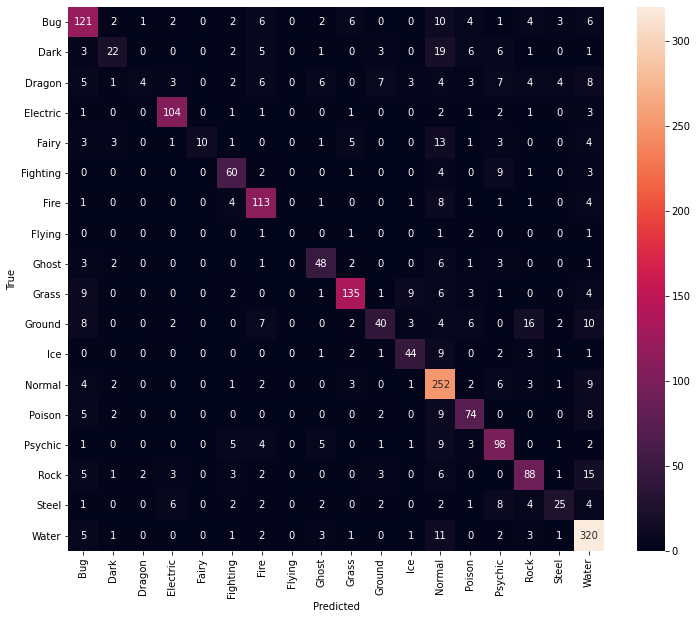

In [24]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm_labels = sorted(pokemon["Type1"].unique())
cm = confusion_matrix(flat_true_labels, np.argmax(pred_probs, axis=1))
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cm_labels, yticklabels=cm_labels, ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Balanced Train Data BERT

In [205]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

pokebert_tokens = []
for i in range(0,len(pokemon_3["Pokedex_bert"])):
    pokebert_tokens.append(tokenizer.encode(pokemon_3["Pokedex_bert"][i], add_special_tokens = True))



In [206]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pokebert_tokens, pokemon_3.label_adjust.values, test_size=0.2, random_state=42, stratify = pokemon_3.label_adjust.values)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_res, y_res = ros.fit_sample(train_input_ids, y_train)

# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
train_input_ids = pad_sequences(X_train, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
test_input_ids = pad_sequences(X_test, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
print('\nDone.')

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 16

#Convert to datatypes to use in PyTorch
train_masks = create_attn_mask(X_res)
train_inputs = torch.tensor(X_res)
train_labels = torch.tensor(y_res, dtype=torch.long)
train_masks = torch.tensor(train_masks)

test_masks = create_attn_mask(test_input_ids)
test_inputs = torch.tensor(test_input_ids)
test_labels = torch.tensor(y_test, dtype=torch.long)
test_masks = torch.tensor(test_masks)

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


In [207]:
from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 18)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [211]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 5

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [212]:
from transformers import AdamW, BertConfig

# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 3e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))


======== Epoch 1 / 5 ========
Training...


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  Batch   100  of  1,577.    Elapsed: 0:00:08.
  Batch   200  of  1,577.    Elapsed: 0:00:16.
  Batch   300  of  1,577.    Elapsed: 0:00:24.
  Batch   400  of  1,577.    Elapsed: 0:00:32.
  Batch   500  of  1,577.    Elapsed: 0:00:39.
  Batch   600  of  1,577.    Elapsed: 0:00:47.
  Batch   700  of  1,577.    Elapsed: 0:00:55.
  Batch   800  of  1,577.    Elapsed: 0:01:03.
  Batch   900  of  1,577.    Elapsed: 0:01:11.
  Batch 1,000  of  1,577.    Elapsed: 0:01:19.
  Batch 1,100  of  1,577.    Elapsed: 0:01:26.
  Batch 1,200  of  1,577.    Elapsed: 0:01:34.
  Batch 1,300  of  1,577.    Elapsed: 0:01:42.
  Batch 1,400  of  1,577.    Elapsed: 0:01:50.
  Batch 1,500  of  1,577.    Elapsed: 0:01:58.

  Average training loss: 1.05
  Training epoch took: 0:02:04

======== Epoch 2 / 5 ========
Training...
  Batch   100  of  1,577.    Elapsed: 0:00:08.
  Batch   200  of  1,577.    Elapsed: 0:00:16.
  Batch   300  of  1,577.    Elapsed: 0:00:23.
  Batch   400  of  1,577.    Elapsed: 0:00:31.
  

In [213]:
# Prediction on test set
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
print('Predicting labels for {:,} test sentences...'.format(len(test_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

  tmp_eval_accuracy = flat_accuracy(logits, label_ids)
  
  # Accumulate the total accuracy.
  eval_accuracy += tmp_eval_accuracy

  # Track the number of batches
  nb_eval_steps += 1

    # Report the final accuracy for this validation run.
print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("  Testing took: {:}".format(format_time(time.time() - t0)))

print('    DONE.')

Predicting labels for 2,146 test sentences...
  Accuracy: 0.84
  Testing took: 0:03:01
    DONE.


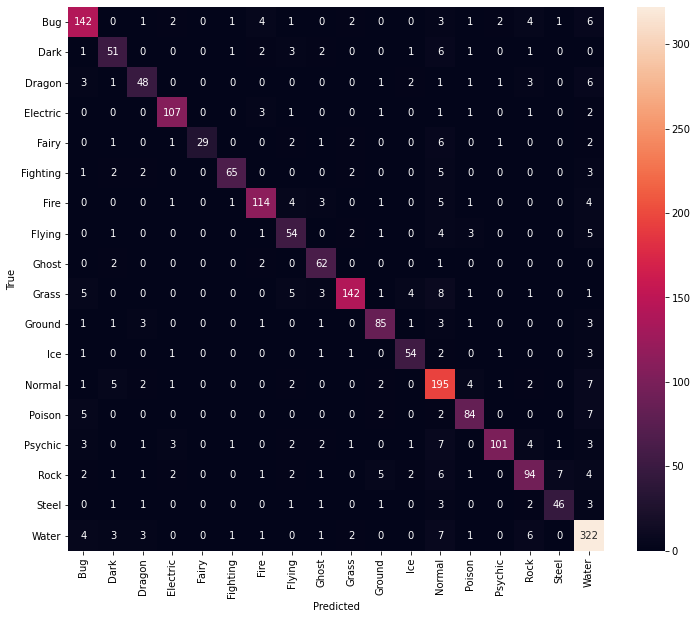

In [214]:
#np.argmax(predictions, axis=1)
from tensorflow import nn
#objects to track outcomes
pred_probs = []
readmit_prob = []

#extract probabilities from logits
for batch in predictions:
  temp_pred_batch = nn.softmax(batch).numpy()
  for pred_arr in temp_pred_batch:
    pred_probs.append(pred_arr)

flat_true_labels = []
for i in range(0,len(true_labels)):
  for label in true_labels[i]:
    flat_true_labels.append(label)


from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm_labels = sorted(pokemon["Type1"].unique())
cm = confusion_matrix(flat_true_labels, np.argmax(pred_probs, axis=1))
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cm_labels, yticklabels=cm_labels, ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [215]:
from sklearn.metrics import classification_report
print(classification_report(flat_true_labels, np.argmax(pred_probs, axis=1), target_names = cm_labels))

              precision    recall  f1-score   support

         Bug       0.84      0.84      0.84       170
        Dark       0.74      0.74      0.74        69
      Dragon       0.77      0.72      0.74        67
    Electric       0.91      0.91      0.91       117
       Fairy       1.00      0.64      0.78        45
    Fighting       0.93      0.81      0.87        80
        Fire       0.88      0.85      0.87       134
      Flying       0.70      0.76      0.73        71
       Ghost       0.79      0.93      0.86        67
       Grass       0.92      0.83      0.87       171
      Ground       0.85      0.85      0.85       100
         Ice       0.83      0.84      0.84        64
      Normal       0.74      0.88      0.80       222
      Poison       0.84      0.84      0.84       100
     Psychic       0.94      0.78      0.85       130
        Rock       0.80      0.73      0.76       129
       Steel       0.84      0.78      0.81        59
       Water       0.85    

## Using RoBERTa Transformer

In [190]:
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base", do_lower_case=True)

In [25]:
pokebert_tokens = []
for i in range(0,len(pokemon_3["Pokedex_bert"])):
    pokebert_tokens.append(tokenizer.encode(pokemon_3["Pokedex_bert"][i], add_special_tokens = True))

In [26]:
print('Max tokenized note length: ', max([len(note) for note in pokebert_tokens]))
print('Average tokenized note length: ', sum([len(note) for note in pokebert_tokens])/ len([len(note) for note in pokebert_tokens]))

Max tokenized note length:  54
Average tokenized note length:  24.62686428038777


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pokebert_tokens, pokemon_3.label.values, test_size=0.2, random_state=42, stratify = pokemon_3.label.values)

In [28]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
train_input_ids = pad_sequences(X_train, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
test_input_ids = pad_sequences(X_test, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "<pad>", ID: 1

Done.


In [29]:
def create_attn_mask(token_list):
  # Create attention masks
  attention_masks = []

  # For each note...
  for note in token_list:
      
      # Create the attention mask.
      #   - If a token ID is 0, then it's padding, set the mask to 0.
      #   - If a token ID is > 0, then it's a real token, set the mask to 1.
      att_mask = [int(token_id > 0) for token_id in note]
      
      # Store the attention mask for this sentence.
      attention_masks.append(att_mask)
  return attention_masks

train_masks = create_attn_mask(train_input_ids)
test_masks = create_attn_mask(test_input_ids)

In [30]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_input_ids)
test_inputs = torch.tensor(test_input_ids)

train_labels = torch.tensor(y_train, dtype=torch.long)
test_labels = torch.tensor(y_test, dtype=torch.long)

train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)

In [31]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [44]:
from transformers import RobertaForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels = 18)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [45]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [46]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 10

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [47]:
import numpy as np

# Helper function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

import time
import datetime

#Helper function for formatting elapsed times.
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [48]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))


======== Epoch 1 / 10 ========
Training...
  Batch   100  of    537.    Elapsed: 0:00:13.
  Batch   200  of    537.    Elapsed: 0:00:26.
  Batch   300  of    537.    Elapsed: 0:00:39.
  Batch   400  of    537.    Elapsed: 0:00:51.
  Batch   500  of    537.    Elapsed: 0:01:04.

  Average training loss: 2.46
  Training epoch took: 0:01:09

======== Epoch 2 / 10 ========
Training...
  Batch   100  of    537.    Elapsed: 0:00:13.
  Batch   200  of    537.    Elapsed: 0:00:26.
  Batch   300  of    537.    Elapsed: 0:00:39.
  Batch   400  of    537.    Elapsed: 0:00:51.
  Batch   500  of    537.    Elapsed: 0:01:04.

  Average training loss: 1.82
  Training epoch took: 0:01:09

======== Epoch 3 / 10 ========
Training...
  Batch   100  of    537.    Elapsed: 0:00:13.
  Batch   200  of    537.    Elapsed: 0:00:26.
  Batch   300  of    537.    Elapsed: 0:00:39.
  Batch   400  of    537.    Elapsed: 0:00:51.
  Batch   500  of    537.    Elapsed: 0:01:04.

  Average training loss: 1.45
  Traini

In [49]:
# Prediction on test set
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
print('Predicting labels for {:,} test sentences...'.format(len(test_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

  tmp_eval_accuracy = flat_accuracy(logits, label_ids)
  
  # Accumulate the total accuracy.
  eval_accuracy += tmp_eval_accuracy

  # Track the number of batches
  nb_eval_steps += 1

    # Report the final accuracy for this validation run.
print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("  Testing took: {:}".format(format_time(time.time() - t0)))

print('    DONE.')

Predicting labels for 2,146 test sentences...
  Accuracy: 0.76
  Testing took: 0:06:08
    DONE.


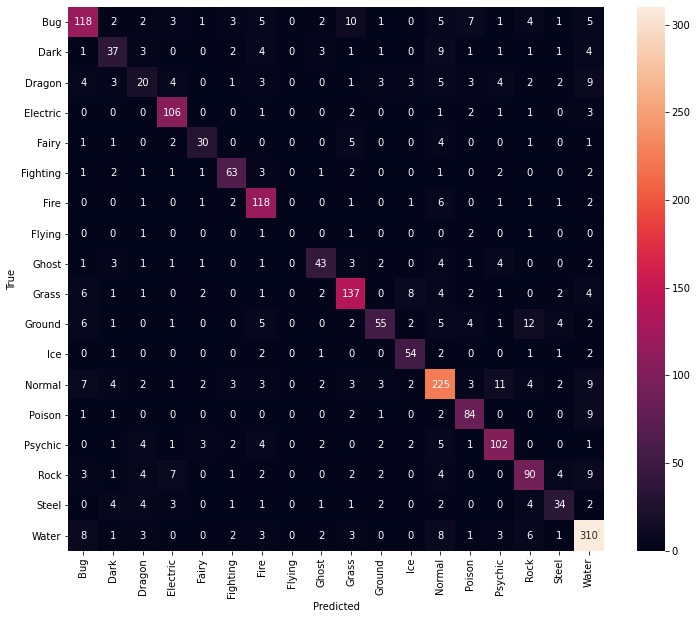

In [51]:
#np.argmax(predictions, axis=1)
from tensorflow import nn
#objects to track outcomes
pred_probs = []
readmit_prob = []

#extract probabilities from logits
for batch in predictions:
  temp_pred_batch = nn.softmax(batch).numpy()
  for pred_arr in temp_pred_batch:
    pred_probs.append(pred_arr)

flat_true_labels = []
for i in range(0,len(true_labels)):
  for label in true_labels[i]:
    flat_true_labels.append(label)


from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm_labels = sorted(pokemon["Type1"].unique())
cm = confusion_matrix(flat_true_labels, np.argmax(pred_probs, axis=1))
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cm_labels, yticklabels=cm_labels, ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Balanced Train Data RoBERTa

In [52]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_res, y_res = ros.fit_sample(train_input_ids, y_train)

train_masks = create_attn_mask(X_res)
train_inputs = torch.tensor(X_res)
train_labels = torch.tensor(y_res, dtype=torch.long)
train_masks = torch.tensor(train_masks)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [56]:
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels = 18)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [57]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

# Number of training epochs (authors recommend between 2 and 4)
epochs = 10

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))


======== Epoch 1 / 10 ========
Training...
  Batch   100  of  1,577.    Elapsed: 0:00:13.
  Batch   200  of  1,577.    Elapsed: 0:00:26.
  Batch   300  of  1,577.    Elapsed: 0:00:39.
  Batch   400  of  1,577.    Elapsed: 0:00:51.
  Batch   500  of  1,577.    Elapsed: 0:01:04.
  Batch   600  of  1,577.    Elapsed: 0:01:17.
  Batch   700  of  1,577.    Elapsed: 0:01:30.
  Batch   800  of  1,577.    Elapsed: 0:01:43.
  Batch   900  of  1,577.    Elapsed: 0:01:56.
  Batch 1,000  of  1,577.    Elapsed: 0:02:08.
  Batch 1,100  of  1,577.    Elapsed: 0:02:21.
  Batch 1,200  of  1,577.    Elapsed: 0:02:34.
  Batch 1,300  of  1,577.    Elapsed: 0:02:47.
  Batch 1,400  of  1,577.    Elapsed: 0:03:00.
  Batch 1,500  of  1,577.    Elapsed: 0:03:13.

  Average training loss: 2.04
  Training epoch took: 0:03:22

======== Epoch 2 / 10 ========
Training...
  Batch   100  of  1,577.    Elapsed: 0:00:13.
  Batch   200  of  1,577.    Elapsed: 0:00:26.
  Batch   300  of  1,577.    Elapsed: 0:00:38.
  Ba

In [58]:
# Prediction on test set
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
print('Predicting labels for {:,} test sentences...'.format(len(test_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

  tmp_eval_accuracy = flat_accuracy(logits, label_ids)
  
  # Accumulate the total accuracy.
  eval_accuracy += tmp_eval_accuracy

  # Track the number of batches
  nb_eval_steps += 1

    # Report the final accuracy for this validation run.
print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("  Testing took: {:}".format(format_time(time.time() - t0)))

print('    DONE.')

Predicting labels for 2,146 test sentences...
  Accuracy: 0.82
  Testing took: 0:04:11
    DONE.


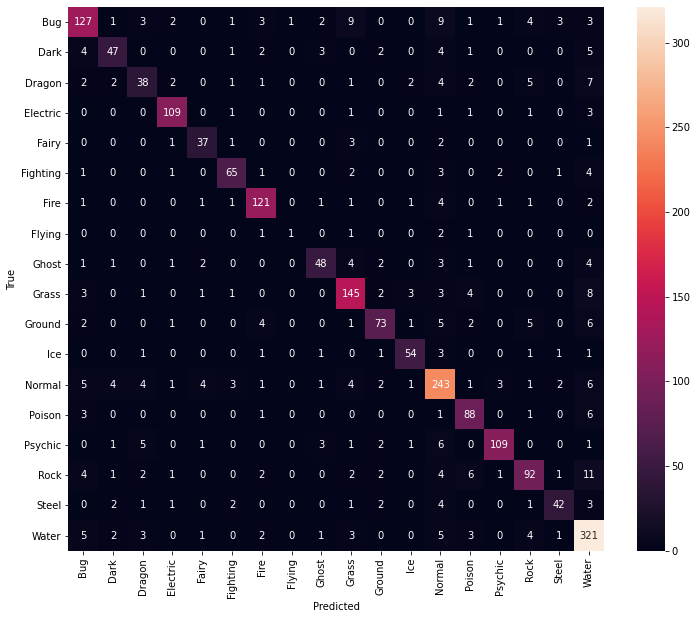

In [59]:
#np.argmax(predictions, axis=1)
from tensorflow import nn
#objects to track outcomes
pred_probs = []
readmit_prob = []

#extract probabilities from logits
for batch in predictions:
  temp_pred_batch = nn.softmax(batch).numpy()
  for pred_arr in temp_pred_batch:
    pred_probs.append(pred_arr)

flat_true_labels = []
for i in range(0,len(true_labels)):
  for label in true_labels[i]:
    flat_true_labels.append(label)


from matplotlib.colors import LogNorm
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
cm_labels = sorted(pokemon["Type1"].unique())
cm = confusion_matrix(flat_true_labels, np.argmax(pred_probs, axis=1))
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cm_labels, yticklabels=cm_labels, ax=ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Multi Type Classification with BERT

Now that we can predict typing with 82% accuracy using either BERT or RoBERTa, we can use BERT with oversampling to predict a Pokemon's dual typing. This should make the precision for Flying much higher because most Flying types have it as their secondary typing.

In [14]:
pokemon_3["Types"] = pokemon_3[["Type1", "Type2"]].values.tolist()
pokemon_3["Types"] = pokemon_3["Types"].apply(lambda row: [val for val in row if val == val])

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
poke_types = mlb.fit_transform(pokemon_3.Types)

In [16]:
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [17]:
pokebert_tokens = []
for i in range(0,len(pokemon_3["Pokedex_bert"])):
    pokebert_tokens.append(tokenizer.encode(pokemon_3["Pokedex_bert"][i], add_special_tokens = True))

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pokebert_tokens, poke_types, test_size=0.2, random_state=42, stratify = poke_types)

In [19]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
train_input_ids = pad_sequences(X_train, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
test_input_ids = pad_sequences(X_test, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


In [21]:
!pip install scikit-multilearn
from skmultilearn.problem_transform import LabelPowerset
from imblearn.over_sampling import RandomOverSampler

# Import a dataset with X and multi-label y

lp = LabelPowerset()
ros = RandomOverSampler(random_state=42, sampling_strategy='not majority')

# Applies the above stated multi-label (ML) to multi-class (MC) transformation.
yt = lp.transform(y_train)
X_resampled, y_resampled = ros.fit_sample(train_input_ids, yt)

# Inverts the ML-MC transformation to recreate the ML set
y_resampled = lp.inverse_transform(y_resampled)
y_resampled = y_resampled.toarray()

     |████████████████████████████████| 92kB 5.3MB/s 


In [336]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_mult_train, y_mult_train = ros.fit_sample(train_input_ids, y_train)

In [23]:
#np.sum(y_mult_train, axis=0)
#np.sum(y_train, axis=0)
np.sum(y_resampled, axis=0)

array([11370, 12886, 12128,  9854,  9096, 11370, 10612, 13644, 12128,
       12128, 12128, 10612, 10612,  9854, 12128, 11370, 12128, 13644])

In [27]:
#train_masks = create_attn_mask(train_input_ids)
train_masks = create_attn_mask(X_resampled)
test_masks = create_attn_mask(test_input_ids)

# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
#train_inputs = torch.tensor(train_input_ids)
train_inputs = torch.tensor(X_resampled)
test_inputs = torch.tensor(test_input_ids)

#train_labels = torch.tensor(y_train, dtype=torch.long)
train_labels = torch.tensor(y_resampled, dtype=torch.long)
test_labels = torch.tensor(y_test, dtype=torch.long)

train_masks = torch.tensor(train_masks)
test_masks = torch.tensor(test_masks)

from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 16

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [28]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 18)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [29]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 1e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [36]:
import random
from torch.nn import BCEWithLogitsLoss
import time
# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 100 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            #elapsed = format_time(time.time() - t0)
            elapsed = round(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed seconds: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        #outputs = model(b_input_ids, 
        #            token_type_ids=None, 
        #            attention_mask=b_input_mask, 
        #            labels=b_labels)
        
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]
        loss_func = BCEWithLogitsLoss() 
        loss = loss_func(logits.view(-1,18),b_labels.type_as(logits).view(-1,18)) 
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        #loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    #print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
    print("  Training epoch took: {:}".format(round(time.time() - t0)), "seconds")


======== Epoch 1 / 3 ========
Training...
  Batch   100  of  6,917.    Elapsed seconds: 13.
  Batch   200  of  6,917.    Elapsed seconds: 27.
  Batch   300  of  6,917.    Elapsed seconds: 40.
  Batch   400  of  6,917.    Elapsed seconds: 53.
  Batch   500  of  6,917.    Elapsed seconds: 67.
  Batch   600  of  6,917.    Elapsed seconds: 80.
  Batch   700  of  6,917.    Elapsed seconds: 93.
  Batch   800  of  6,917.    Elapsed seconds: 106.
  Batch   900  of  6,917.    Elapsed seconds: 120.
  Batch 1,000  of  6,917.    Elapsed seconds: 133.
  Batch 1,100  of  6,917.    Elapsed seconds: 146.
  Batch 1,200  of  6,917.    Elapsed seconds: 159.
  Batch 1,300  of  6,917.    Elapsed seconds: 172.
  Batch 1,400  of  6,917.    Elapsed seconds: 186.
  Batch 1,500  of  6,917.    Elapsed seconds: 199.
  Batch 1,600  of  6,917.    Elapsed seconds: 212.
  Batch 1,700  of  6,917.    Elapsed seconds: 225.
  Batch 1,800  of  6,917.    Elapsed seconds: 238.
  Batch 1,900  of  6,917.    Elapsed seconds: 

In [39]:
from tensorflow import nn

# Prediction on test set
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0
print('Predicting labels for {:,} test sentences...'.format(len(test_inputs)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels, predictions_softmax = [], [], []

# Predict 
for batch in test_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  pred_label = torch.sigmoid(logits)

  # Move logits and labels to CPU
  pred_label_softmax = nn.softmax(logits.to('cpu').numpy())
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  pred_label = pred_label.to('cpu').numpy()
  
  # Store predictions and true labels
  #logit_preds.append(logits)
  predictions.append(pred_label)
  predictions_softmax.append(pred_label_softmax)
  true_labels.append(label_ids)

  tmp_eval_accuracy = flat_accuracy(logits, label_ids)
  
  # Accumulate the total accuracy.
  eval_accuracy += tmp_eval_accuracy

  # Track the number of batches
  nb_eval_steps += 1

    # Report the final accuracy for this validation run.
#print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
#print("  Testing took: {:}".format(format_time(time.time() - t0)))

print('    DONE.')

Predicting labels for 2,146 test sentences...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


    DONE.


In [445]:
model.save_pretrained("multitype_pokemon")

In [242]:
from google.colab import files
files.download('multitype_pokemon/config.json') 
files.download('multitype_pokemon/pytorch_model.bin') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Because a Pokemon can only ever have two types, the labels are not independent of one another. We cannot use normal metrics because we are guaranteed that at least 14 labels will match, meaning the minimum accuracy would be close to 80%. We instead need to look at the accuracy of the predicted types only (we can get the indices).
- If Pokemon has 1 type for true and predicted, accuracy is either 0 or 100%.
- If Pokemon has 2 types for true, accuracy is 50% for each type
- If Pokemon has 1 type for true, 2 for predicted, initial thought is to have accuracy as 89% if in one of those two types (since there is a 2/18, or 17/(18 C 2) probability of getting the correct type). However, this encourages having two types, whereas many only have one type. So we lower this to 0.67 to try to have a better match in number of types.

In [40]:
#np.argmax(predictions, axis=1)
pred_probs = []
#extract probabilities from logits
for batch in predictions_softmax:
  temp_pred_batch = batch.numpy()
  for pred_arr in temp_pred_batch:
    pred_probs.append(pred_arr)

flat_true_labels = []
for i in range(0,len(true_labels)):
  for label in true_labels[i]:
    flat_true_labels.append(label)

In [76]:
cutoff = 0.01

true_indices = []
for i in range(0, len(flat_true_labels)):
  true_indices.append(list(np.where(flat_true_labels[i]==1)[0]))

pred_indices = []
for i in range(0, len(pred_probs)):
  if sum([1 if x > cutoff else 0 for x in pred_probs[i]]) < 2:
    pred_indices.append([np.argmax(pred_probs[i])])
  else: pred_indices.append(list(pred_probs[i].argsort()[-2:]))

test_acc = []
for i in range(0,len(true_indices)):
  if len(true_indices[i]) == 1 and len(pred_indices[i]) == 1:
    test_acc.append(int(pred_indices[i] == true_indices[i]))
  elif len(true_indices[i]) == 2:
    acc = 0
    for ind in pred_indices[i]:
      if ind in true_indices[i]:
        acc += 0.5
    test_acc.append(acc)
  elif len(true_indices[i]) == 1 and len(pred_indices[i]) == 2:
    if true_indices[i] in pred_indices[i]:
      test_acc.append(0.67)
    else: test_acc.append(0)

print("Test accuracy:", round(np.mean(test_acc),4)*100, "%")

Test accuracy: 81.87 %


In [42]:
print("Average number of predicted types per Pokemon:", round(np.mean([len(pred_indices[i]) for i in range(0,len(pred_indices))]),3))
print("Average number of true types per Pokemon:", round(np.mean([len(true_indices[i]) for i in range(0,len(true_indices))]),3))
print("Average difference of types per Pokemon", round(np.mean([abs(len(true_indices[i]) - len(pred_indices[i])) for i in range(0,len(true_indices))]),3))

Average number of predicted types per Pokemon: 1.464
Average number of true types per Pokemon: 1.498
Average difference of types per Pokemon 0.205


## Testing New Data

In [47]:
def poke_prediction(sentence, tokenizer, model):
  sentence = sentence.lower() #make everything lower-case
  sentence = re.sub('é', 'e', sentence) #remove "Pokemon"
  sentence = re.sub(r'[’-]', ' ', sentence) #separate dashes and bad apostrophe
  sentence = re.sub(r'[^a-zA-Z ]', '', sentence) #remove punctuation
  sentence = re.sub(r"\s+", ' ', sentence) #get rid of extra spaces

  test_encodings = tokenizer.batch_encode_plus([sentence],max_length=64,pad_to_max_length=True)

  test_input_ids = test_encodings['input_ids']
  test_token_type_ids = test_encodings['token_type_ids']
  test_attention_masks = test_encodings['attention_mask']

  # Make tensors out of data
  test_inputs = torch.tensor(test_input_ids)
  test_masks = torch.tensor(test_attention_masks)
  test_token_types = torch.tensor(test_token_type_ids)
  # Create test dataloader
  test_data = TensorDataset(test_inputs, test_masks, test_token_types)
  test_sampler = SequentialSampler(test_data)
  test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=1)

  # Test

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  #track variables
  logit_preds,pred_labels,tokenized_texts = [],[],[]

  # Predict
  for i, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_token_types = batch
    with torch.no_grad():
      # Forward pass
      outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
      b_logit_pred = outs[0]
      pred_label = torch.sigmoid(b_logit_pred)
      pred_label_softmax = nn.softmax(b_logit_pred.to('cpu').numpy())

      b_logit_pred = b_logit_pred.detach().cpu().numpy()
      pred_label = pred_label.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    pred_labels.append(pred_label)

  # Flatten outputs
  tokenized_texts = [item for sublist in tokenized_texts for item in sublist]
  pred_labels = [item for sublist in pred_labels for item in sublist]
  # Converting flattened binary values to boolean values

  cutoff = 0.01

  pred_indices = []
  for i in range(0, len(pred_label_softmax)):
    if sum([1 if x > cutoff else 0 for x in pred_label_softmax[i]]) < 2:
      pred_indices.append([np.argmax(pred_label_softmax[i])])
    else: pred_indices.append(list(pred_label_softmax[i].numpy().argsort()[-2:]))


  types = ['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Flying',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

  pred_types = [types[i] for i in pred_indices[0]]

  return(pred_types)

In [448]:
print(poke_prediction("this pokemon can see into the future", tokenizer, model))
print(poke_prediction("sparks fly in battle with this mouse", tokenizer, model))
print(poke_prediction("I want to be electric and ice type", tokenizer, model))
print(poke_prediction("There is a plant seed on its back right from the day this Pokémon is born. The seed slowly grows larger.", tokenizer, model))
print(poke_prediction("It has a preference for hot things. When it rains, steam is said to spout from the tip of its tail.", tokenizer, model))
print(poke_prediction("It loves to play when it rains.", tokenizer, model))


['Psychic']
['Electric']
['Ice']
['Poison', 'Grass']
['Fire']
['Ice', 'Grass']


In [503]:
#Blue Eyes White Dragon
print(poke_prediction("This legendary monster is a powerful engine of destruction. Virtually invincible, very few have faced this awesome creature and lived to tell the tale.", tokenizer, model))
#Obelisk the Tormentor
print(poke_prediction("The descent of this mighty creature shall be heralded by burning winds and twisted land. And with the coming of this horror, those who draw breath shall know the true meaning of eternal slumber.", tokenizer, model))

['Dragon']
['Fire', 'Ghost']


In [71]:
new_df = pd.DataFrame(columns=['Text', 'Prediction'])
sentences = ["Jimmy neutron boy genius", \
             "found scavenging the underbrush, eating apples", \
             "Courage the Cowardly Dog", "I've got friends on the other side", \
             "the little mermaid", \
             "thomas edison"]
for sentence in sentences:
  new_df = new_df.append({"Text": sentence, "Prediction": poke_prediction(sentence, tokenizer, model)}, ignore_index = True)
new_df

,Text,Prediction
0,Jimmy neutron boy genius,"[Electric, Psychic]"
1,"found scavenging the underbrush, eating apples","[Grass, Normal]"
2,Courage the Cowardly Dog,[Normal]
3,I've got friends on the other side,[Ghost]
4,the little mermaid,[Water]
5,thomas edison,[Electric]
